## Import Libraries and Data

In [4]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2407-0308-2023.csv', firstRow=696, lastRow=702)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_310723_S697-702.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [5]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=460s; mass=45.37925g
This equals a volume of 45.47m; expected was 45.368mL; error is 0.225%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.0005 g/s^2


<IPython.core.display.Javascript object>


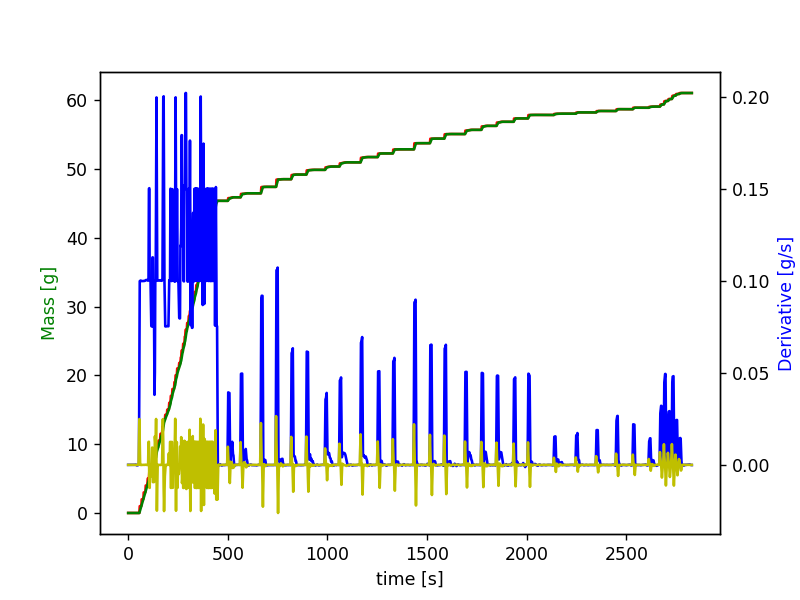

Addition of 0.512g Texapon SB 3 KC detected from 496s to 536s - expected volume = 0.5mL and actual volume = 0.465mL (resulting error is 6.964%)
Addition of 0.584g Texapon SB 3 KC detected from 560s to 602s - expected volume = 0.5mL and actual volume = 0.531mL (resulting error is 6.2%)
Addition of 0.943g Plantapon ACG 50 detected from 662s to 694s - expected volume = 0.873mL and actual volume = 0.829mL (resulting error is 4.985%)
Addition of 1.115g Plantapon ACG 50 detected from 738s to 780s - expected volume = 0.925mL and actual volume = 0.997mL (resulting error is 7.843%)
Addition of 0.678g Plantapon ACG 50 detected from 814s to 848s - expected volume = 0.555mL and actual volume = 0.605mL (resulting error is 9.043%)
Addition of 0.691g Plantapon ACG 50 detected from 890s to 930s - expected volume = 0.555mL and actual volume = 0.617mL (resulting error is 11.215%)
Addition of 0.483g Plantacare 818 detected from 984s to 1028s - expected volume = 0.509mL and actual volume = 0.444mL (result

In [6]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.000375 g/s^2


<IPython.core.display.Javascript object>


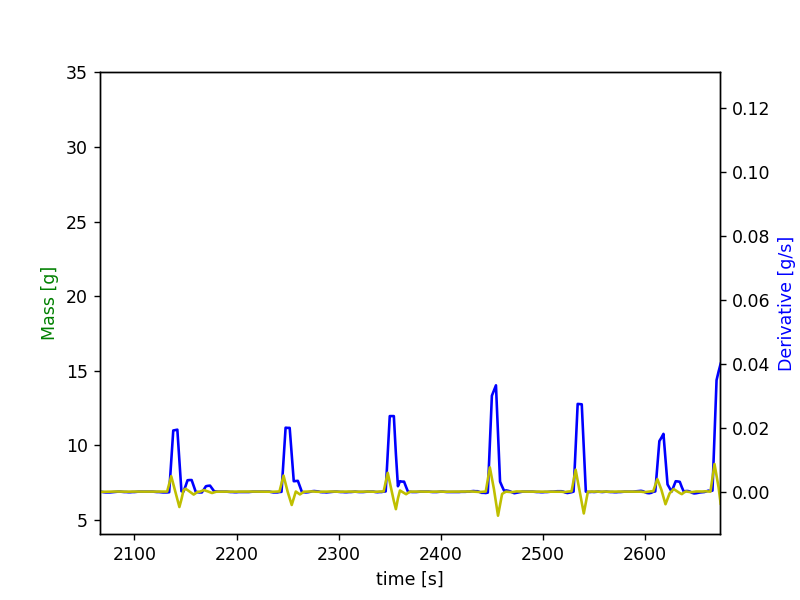

Addition of 0.194g Salcare Super 7 detected from 2132s to 2180s - expected volume = 0.223mL and actual volume = 0.175mL (resulting error is 21.573%)
Addition of 0.184g Salcare Super 7 detected from 2242s to 2268s - expected volume = 0.164mL and actual volume = 0.167mL (resulting error is 1.657%)
Addition of 0.213g Salcare Super 7 detected from 2344s to 2372s - expected volume = 0.19mL and actual volume = 0.193mL (resulting error is 1.667%)
Addition of 0.264g Salcare Super 7 detected from 2444s to 2464s - expected volume = 0.169mL and actual volume = 0.242mL (resulting error is 42.973%)
Addition of 0.218g Salcare Super 7 detected from 2528s to 2546s - expected volume = 0.105mL and actual volume = 0.199mL (resulting error is 89.239%)
Addition of 0.169g Salcare Super 7 detected from 2608s to 2640s - expected volume = 0.134mL and actual volume = 0.153mL (resulting error is 14.189%)


In [11]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=3, mergeSens=8, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


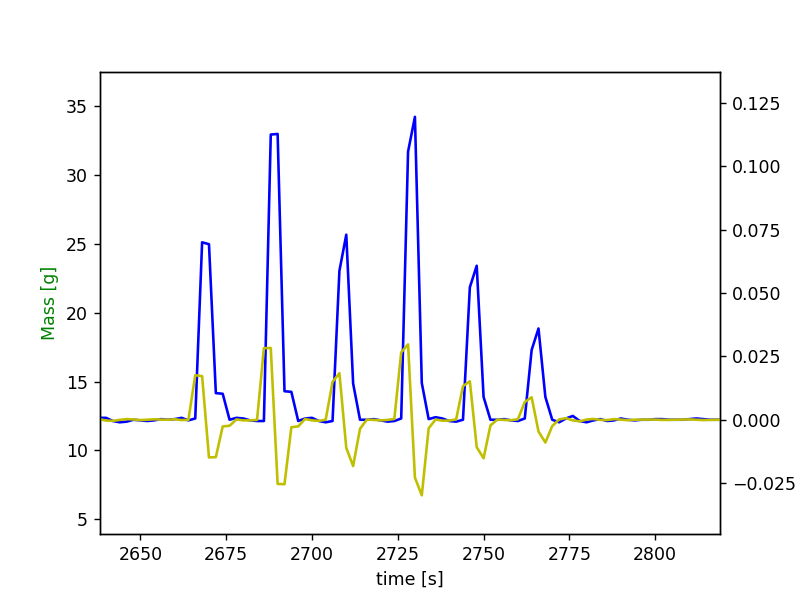

Addition of 0.325g Arlypon TT detected from 2664s to 2680s - expected volume = 0.36mL and actual volume = 0.337mL (resulting error is 6.214%)
Addition of 0.494g Arlypon TT detected from 2684s to 2700s - expected volume = 0.511mL and actual volume = 0.517mL (resulting error is 1.23%)
Addition of 0.289g Arlypon TT detected from 2704s to 2718s - expected volume = 0.231mL and actual volume = 0.302mL (resulting error is 30.543%)
Addition of 0.481g Arlypon TT detected from 2724s to 2738s - expected volume = 0.454mL and actual volume = 0.509mL (resulting error is 12.238%)
Addition of 0.242g Arlypon TT detected from 2742s to 2756s - expected volume = 0.207mL and actual volume = 0.255mL (resulting error is 23.469%)
Addition of 0.143g Arlypon TT detected from 2760s to 2774s - expected volume = 0.109mL and actual volume = 0.151mL (resulting error is 37.981%)


In [12]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2600,2616,2636,2656,2676,2884,2906])

## Consolidate results and create output

In [13]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_310723_S697-S702.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_24360\3225456913.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
696,697.0,0.000000,9.461764,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,10.009313,0.0,0.0,0.0,1.950517,0.0,3.254205
697,698.0,0.000000,0.000000,0.0,11.01362,0.000000,0.000000,0.000000,6.190122,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.854416,0.0,4.978705
698,699.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,8.784058,11.503865,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.090277,0.0,2.824566
699,700.0,10.511963,10.697107,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.537337,0.0,4.619009
700,701.0,0.000000,13.171929,0.0,0.00000,7.460148,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.094047,0.0,2.328590
701,702.0,0.000000,0.000000,0.0,0.00000,0.000000,10.965373,12.973035,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.642279,0.0,1.394480
